## **Data Science Aplicado a las Finanzas** 🚀
### **Sesión 12: Value at Risk**

Andrés C. Medina Sanhueza

Senior Data Scientist Engineer 

anmedinas@gmail.com

### 🐛 Value at Risk

El riesgo de mercdo, es la posibilidad de que se produzcan pérdidas en el valor del portafolio explicado por cambios en los precios de mercado. Normalmente, se consideran como factores de riesgo las **tasas de interés**, **tipos de cambio**, **renta variable** y **commodities**. Este riesgo, se debe medir y gestionar en frecuencia diaria por parte de las instituciones financieras, para ello se recurre a la metodologia `Value at Risk (VaR)`

"*El VaR corresponde a la máxima pérdida esperada en un período de tiempo dado, con un nivel de confianza dado por las circunstancias normales de mercado*"

Por tanto, el `VaR` corresponde a una medida cuantitativa expresada en unidades monetarias, por ej: 10MM. Por otro lado, además de que el `VaR` puede referirse a un día o a una semana, el período de tiempo adoptado debiera reflejar algún tipo de gestión, por ejemplo: el tiempo necesario para deshacer o cubrir una posición. El nivel de confianza adoptado se atribuye al intervalo de confianza y al nivel de riesgo asumido, normalmente un 99%. Adicionalmente, es factible calcular `VaR` tanto para un activo individual como para una cartera de activos.

El `VaR` esta construido para evaluar riesgo bajo condiciones *normales*, esto quiere decir que excluye eventos anormales de crísis, estos últimos pueden ser aborados a partir de otros instrumentos como las puebas de `stress test`. Generalmente, el `VaR` es implementado en conjunto con `stress test` para abordar el riesgo asumido tanto en condiciones de normalidad como anormalidad.

Supongamos que el retorno de la cartera $R$ es una variable aleatoria con función de densidad $f(r)$. $R$ sigue una distribución estadística, típicamente asumida normal o basado en datos históricos. Para un nivel de confianza $(1-\alpha)$ , el `VaR` se define como:

\begin{equation*}
\hbox{VaR}_{\alpha} = \inf{\{v \in\mathbb{R}: P(R\leq -v)\geq \alpha}\}
\end{equation*}

Esto, equivale a encontrar el percentil $\alpha$ de la distribución de pérdidas.

<img src="VaR.png" width = 500 height = 400 />

Si $x$ representa las proporciones de los activos en una cartera ($x\geq 0$ y $\sum x_{i} = 1$), entonces las pérdidas potenciales $L(x)$ depende de $x$. El problema de optimización puede formularse como:

\begin{equation*}
\min_{x} \hbox{VaR}_{\alpha}(x)
\end{equation*}

sujeto a restricciones como:

1. Rentabilidad esperada mínima : $\mathbb{E}\left[R(x)\right] \geq r_{min}$
2. Límites regulatorios: $x\geq 0$ y $\sum x_{i} \leq 1$ 

Existen varios enfoques de solución para resolver el `VaR`.

* `VaR Histórico` Utiliza la historia de los retornos de los activos. Se ordenan las pérdidas y se calcula el percentil correspondiente. 

* `VaR Paramétrico` Supone que los retornos siguen una distribución normal u otra conocida. El `VaR` se calcula como $\hbox{VaR} = \mu + z_{\alpha}\sigma$ donde $\mu$ es el retorno esperado, $\sigma$ es la desviación estándar y $z_\alpha$ es el percentil de la distribución normal estándar. 

* `VaR mediante simulación de Monte Carlo`. Se generan retornos simulados de la cartera a partir de distribuciones de probabilidad, luego se evalúa el percentil de las pérdidas.

* `Optimización basada en programación lineal` Cuando se incopora el `VaR` en un modelo de optimización, puede resolverse mediante técnicas como: 

    * Programación lineal por escenarios.
    * Programación estocástica 
    * `VaR` Condicional (`CVaR`)

#### 🐞 Var Histórico

También conocido como *simulación histórica*, tiene como ventaja el hecho de que no asume ningún supuesto de distribución de los factores de riesgo. Adicionalmente, su ventaja radica en su simpleza conceptual operativa. La desventaja es que está absolutamente sujeta a los datos disponibles (historia reciente)

Calculamos durante un período al menos de 2 años las pérdidas reales de un valor o de una cartera y obtenemos el nivel de pérdida que separa el 95% o 99% de los casos. Podríamos suponer un comportamiento futuro si no idéntico, si al menos en un orden de magnitud similar que en el pasado.

El principal supuesto es que la evolución pasada permite extrapolar una evolución futura similar, lo cual no tiene porque ser cierto, dados los ciclos de mercado. Por otro lado, esta aproximación no requiere un poder de cálculo relevnte lo que sin duda es una ventaja.

In [2]:
# Modulos necesario
from matplotlib import pyplot as plt 
import seaborn as sns 
import yfinance as yf
import numpy as np
import pandas as pd
import warnings 

# Configuraciones 
warnings.simplefilter("ignore")
sns.set_style('dark')

# Descargar datos históricos de Apple
start_date = '2010-12-03'
end_date = '2021-01-13'
ticker = "AAPL"

# Calculo de Retornos Logaritmicos
data = yf.download(ticker, start = start_date, end = end_date, progress = False)
data["Returns"] = np.log(data["Close"] / data["Close"].shift(1))
data.dropna(inplace = True)

# Calculo VaR Historico
confidence_level = 0.95
VaR_historical = np.percentile(data["Returns"], (1 - confidence_level) * 100)
print(f"VaR Historico (95% confidence level): {VaR_historical:.2%}")

VaR Historico (95% confidence level): -2.61%


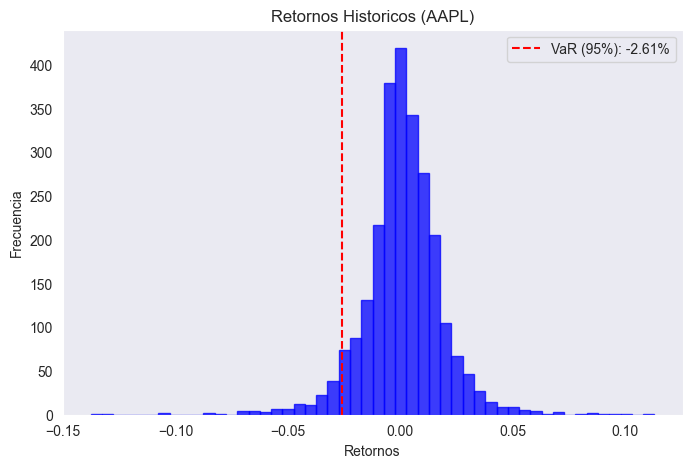

In [3]:
# Histograma de Retornos y VaR 
plt.figure(figsize = (8, 5))
plt.hist(data["Returns"], bins = 50, alpha = 0.75, color = 'blue', edgecolor = 'blue')
plt.axvline(VaR_historical, color='red', linestyle='--', label=f'VaR (95%): {VaR_historical:.2%}')
plt.title('Retornos Historicos (AAPL)')
plt.xlabel('Retornos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

En este ejemplo, utilizamos los rendimientos históricos de Apple Inc. (AAPL) para calcular el VaR. El histograma muestra la distribución de los rendimientos históricos y la línea discontinua roja representa el umbral del VaR con un nivel de confianza del 95%. Este histograma ayuda a comprender dónde se encuentran las pérdidas potenciales en la distribución de los rendimientos pasados.

In [4]:
confidence_level = 0.95
posicion = 1000000
VaR_historical = np.percentile(data["Returns"], (1 - confidence_level) * 100) * posicion
VaR_historical

np.float64(-26072.317289454168)

In [5]:
# Calculo del VaR Historico utilizando un modelo EGARCH 
from arch import arch_model
from scipy.stats import norm

egarch_model = arch_model(data["Returns"]*100, p = 1, q = 1, vol = 'EGARCH', dist = 'normal') 
egarch_results = egarch_model.fit(disp = 'off')
egarch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -4844.10
Distribution:                  Normal   AIC:                           9696.20
Method:            Maximum Likelihood   BIC:                           9719.57
                                        No. Observations:                 2543
Date:                Sat, Aug 09 2025   Df Residuals:                     2542
Time:                        17:47:41   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1763  3.591e-02      4.910  9.126e-07 [  0.106,  0.247]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0659  2.130e-02      3.094  1.978e-03 [2.415e-02,  0.108]
alpha[1]       0.2193  3.982e-02      5.507  3.646e-08   [  0.141,  0.297]
beta[1]        0.9490  1.840e-02     51.568      0.000   [  0.913,  0.985]
==========================================================================

Covariance estimator: robust
"""

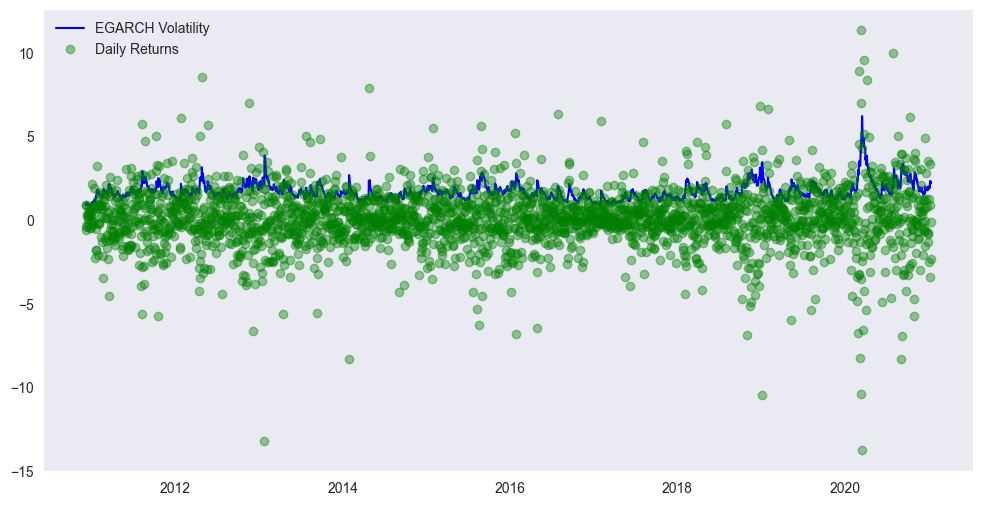

In [6]:
# Volatilidad Condicional
egarch_volatility = egarch_results.conditional_volatility

# Plot model fitting results
plt.figure(figsize = (12,6))
plt.plot(egarch_volatility, color = 'blue', label = 'EGARCH Volatility')
plt.plot(data["Returns"]*100, 'og' ,color = 'green', label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper left', frameon = False)
plt.show()

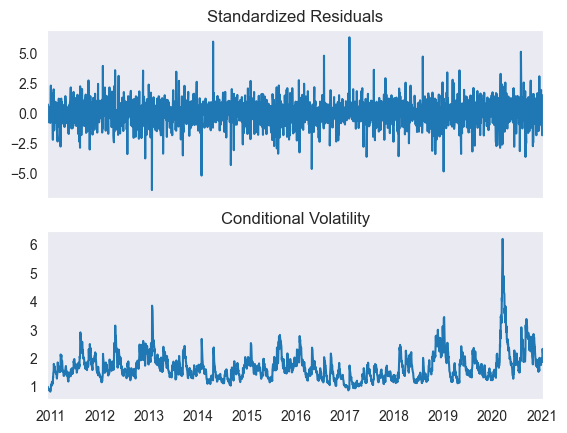

In [7]:
egarch_results.plot()
plt.show()

In [8]:
# Obtiene la volatilidad condicional 
conditional_volatility = egarch_results.conditional_volatility

# Calculo del VaR diario a nivel de confianza especifico 
z_score_95 = norm.ppf(1 - 0.95)
z_score_97 = norm.ppf(1 - 0.97)
z_score_99 = norm.ppf(1 - 0.99)

VaR_95 = - z_score_95 * conditional_volatility
VaR_97 = - z_score_97 * conditional_volatility
VaR_99 = - z_score_99 * conditional_volatility

# Guardo el VaR como columna nueva 
data['VaR_95'] = VaR_95
data['VaR_97'] = VaR_97
data['VaR_99'] = VaR_99

# Mostrar resultados
print(f"Valor en Riesgo (VaR) al {confidence_level * 100:.1f}% de confianza:")
print(f"VaR promedio diario: ({VaR_95.mean():.2f}%)")

Valor en Riesgo (VaR) al 95.0% de confianza:
VaR promedio diario: (2.78%)


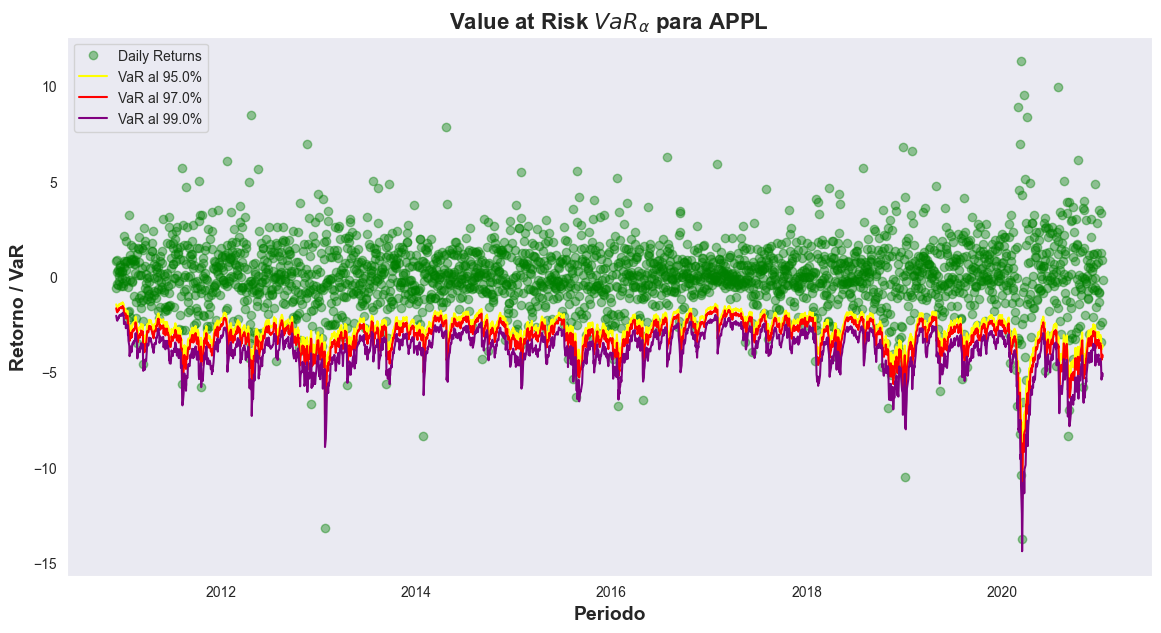

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Returns']*100, 'og', label = 'Daily Returns', alpha = 0.4)
plt.plot(data.index, -VaR_95, label=f'VaR al {0.95 * 100:.1f}%', color = 'yellow')
plt.plot(data.index, -VaR_97, label=f'VaR al {0.97 * 100:.1f}%', color = 'red')
plt.plot(data.index, -VaR_99, label=f'VaR al {0.99 * 100:.1f}%', color = 'purple')
plt.title(r"Value at Risk $VaR_{\alpha}$ para APPL", fontsize = 16, fontweight = 'bold')
plt.xlabel("Periodo", fontsize = 14, fontweight = 'bold')
plt.ylabel("Retorno / VaR", fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()

#### 🦜 VaR Paramétrico (Varianza - Covarianza)

A diferencia de las metodologías no parámetricas, el cálculo del `VaR` paramétrico se basa en asumir que las rentabilidades de los activos y de las carteras se distribuirán de forma aproximada a la de una función de densidad determinada, la distribución normal es por lejos la más utilizada.

La principal ventaja de esta aproximación, es que obtenemos más información y es más fácil trabajar con ella, al proyectar características bien conocidas de distribuciones estadísticas sobre los datos que empleamos.

\begin{equation*}
\hbox{VaR} = (\mu + z_{\alpha}\sigma)\cdot V
\end{equation*}

Siendo $\mu$ la rentabilidad esperada, $z$ el valor correspondiente para un nivel de significancia (por ejemplo, 1.645 para un 5%), $\sigma$ la desviación típica de la rentabilidad y $V$ el valor de la inversión.

Notar que $z_\alpha = -1.645$ si $\hbox{VaR}_{0.95}$, $z_\alpha = -1.96$ si $\hbox{VaR}_{0.975}$ y $z_\alpha = -2.326$ si $\hbox{VaR}_{0.99}$

In [11]:
from scipy.stats import norm

# Descargar datos históricos de Apple
start_date = '2010-12-03'
end_date = '2021-01-13'
ticker = "AAPL"

# Calculo de Retornos Logaritmicos
data = yf.download(ticker, start = start_date, end = end_date, progress = False)
data["Returns"] = np.log(data["Close"] / data["Close"].shift(1))
data.dropna(inplace=True)

# Calculo de Media y Desviacion Standar
mean_return = data['Returns'].mean()
std_dev = data['Returns'].std()

# Calculo de VaR con nivel de confianza al 95% usando  Z-score
confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)

# VaR Parametrico
VaR_variance_covariance = mean_return + z_score * std_dev

print(f"VaR (Varianza-Covarianza) (95% confidence level): {VaR_variance_covariance:.2%}")

VaR (Varianza-Covarianza) (95% confidence level): -2.84%


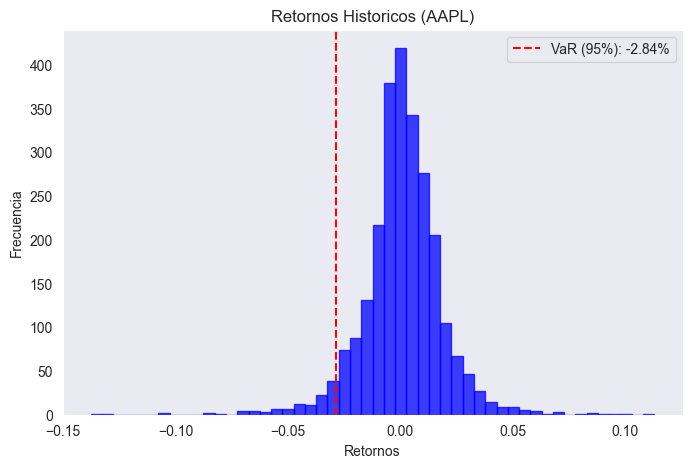

In [12]:
# Histograma de Retornos y VaR parametrico 
plt.figure(figsize = (8, 5))
plt.hist(data["Returns"], bins = 50, alpha = 0.75, color = 'blue', edgecolor = 'blue')
plt.axvline(VaR_variance_covariance, color='red', linestyle='--', label=f'VaR (95%): {VaR_variance_covariance:.2%}')
plt.title('Retornos Historicos (AAPL)')
plt.xlabel('Retornos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [15]:
# Funcion que estima el VaR Parametrico 

def var_parametrico(serie,  confidence_level = 0.95):
    # Retornos Promedio
    mean_return = serie.mean()
    # Desviacion tipica
    std_dev = serie.std()
    # Nivel de confianza
    z_score = norm.ppf(1 - confidence_level)
    # Var Parametrico
    VaR_variance_covariance = ( mean_return + z_score * std_dev )
    print(f"VaR (Varianza-Covarianza) (95% confidence level): {VaR_variance_covariance:.2%}")

In [16]:
var_parametrico(data['Returns'], confidence_level = 0.95)

VaR (Varianza-Covarianza) (95% confidence level): -2.84%


In [17]:
# Calculo del VaR Parametrico utilizando un modelo EGARCH 
garch_model = arch_model(data["Returns"]*100, p = 1, q = 1, vol = 'GARCH', dist = 'normal') 
garch_results = egarch_model.fit(disp = 'off')
garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -4844.10
Distribution:                  Normal   AIC:                           9696.20
Method:            Maximum Likelihood   BIC:                           9719.57
                                        No. Observations:                 2543
Date:                Sat, Aug 09 2025   Df Residuals:                     2542
Time:                        17:55:14   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1763  3.591e-02      4.910  9.126e-07 [  0.106,  0.247]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0659  2.130e-02      3.094  1.978e-03 [2.415e-02,  0.108]
alpha[1]       0.2193  3.982e-02      5.507  3.646e-08   [  0.141,  0.297]
beta[1]        0.9490  1.840e-02     51.568      0.000   [  0.913,  0.985]
==========================================================================

Covariance estimator: robust
"""

In [18]:
# Obtiene la volatilidad condicional y media condicional
conditional_volatility = garch_results.conditional_volatility
conditional_mean = garch_results.params['mu']

# Calculo del VaR parametrico a nivel de confianza especifico 
z_score_95 = norm.ppf(1 - 0.95)
z_score_97 = norm.ppf(1 - 0.97)
z_score_99 = norm.ppf(1 - 0.99)

VaR_95 = - (conditional_mean + z_score_95 * conditional_volatility)
VaR_97 = - (conditional_mean + z_score_97 * conditional_volatility)
VaR_99 = - (conditional_mean + z_score_99 * conditional_volatility)

# Guardo el VaR como columna nueva 
data['VaR_95'] = VaR_95
data['VaR_97'] = VaR_97
data['VaR_99'] = VaR_99

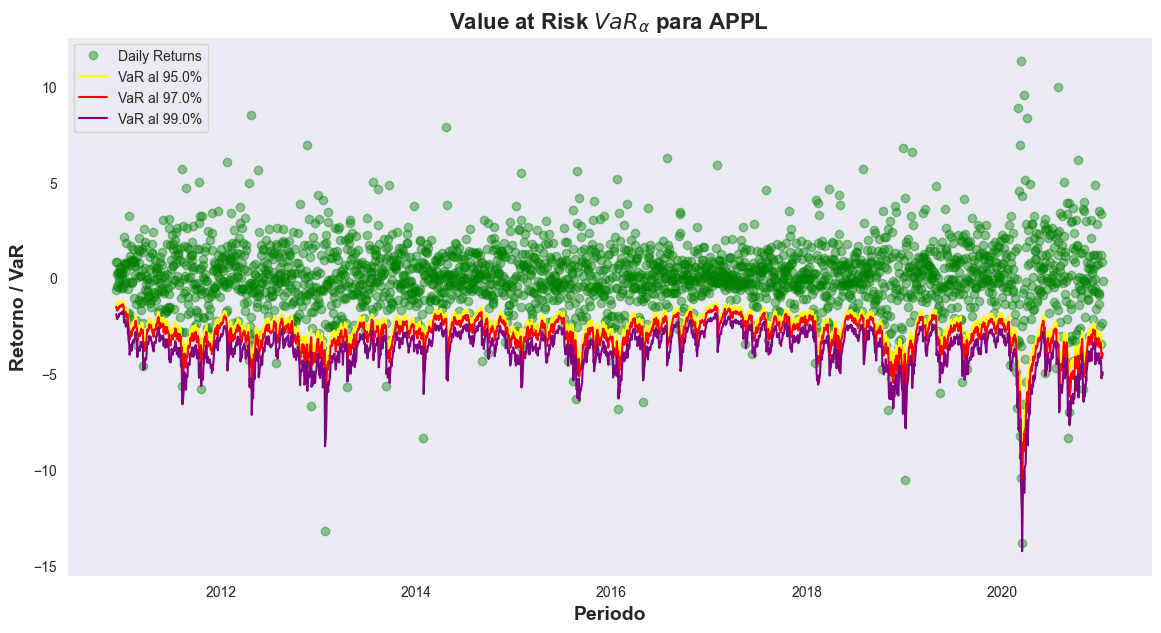

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Returns']*100, 'og', label = 'Daily Returns', alpha = 0.4)
plt.plot(data.index, -VaR_95, label=f'VaR al {0.95 * 100:.1f}%', color = 'yellow')
plt.plot(data.index, -VaR_97, label=f'VaR al {0.97 * 100:.1f}%', color = 'red')
plt.plot(data.index, -VaR_99, label=f'VaR al {0.99 * 100:.1f}%', color = 'purple')
plt.title(r"Value at Risk $VaR_{\alpha}$ para APPL", fontsize = 16, fontweight = 'bold')
plt.xlabel("Periodo", fontsize = 14, fontweight = 'bold')
plt.ylabel("Retorno / VaR", fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()

In [20]:
# VaR promedio al 99% de las acciones de APPL 
np.mean(data['VaR_99'])

np.float64(3.7494954668354255)

Si queremos generalizar para un período de $T$ días, entonces $R_t \sim \mathcal{N}(T\mu, T\sigma^2)$ y el `Var` queda de la siguiente manera:

\begin{equation*}
\hbox{VaR} = (T\mu + z_{\alpha}\sigma\sqrt{T})
\end{equation*}

Ahora, si $X$ e $Y$ corresponden a dos activos financieros, y $\lambda_X$, $\lambda_Y$ son las proporciones de dinero invertidas en $X$ e $Y$, entonce el retorno diario del portafolio es:

\begin{equation*}
R_t = X\lambda_X + Y\lambda_Y
\end{equation*}

y la media y varianza están dadas por:


\begin{equation*}
\begin{aligned}
\mu_p &= \mathbb{E}(R_p) = \lambda_X\mu_X + \lambda_Y\mu_Y \\
\sigma_p^2 &= \mathbb{Var}(R_p) = \lambda_X^2\sigma_X^2 + \lambda_Y^2\sigma_Y^2 + 2\lambda_X\lambda_Y\sigma_{XY}
\end{aligned}
\end{equation*}


Donde $\sigma_{XY}$ es la matriz de covarianza entre $X$ e $Y$. Si $X$ e $Y$ están normalmente distribuidas, también lo es $R_p$ y su `VaR` diario al 99%

\begin{equation*}
\hbox{Var} = (\mu_p + z_{\alpha}\sigma_p)
\end{equation*}

Generalizando para $n$ activos:

\begin{equation*}
\hbox{Var} = (\mu_p + z_{\alpha}\sigma_p\sqrt{T})
\end{equation*}

Donde:
* $\sigma_p = \lambda\Omega\lambda^\intercal $
* $\Omega$ es la matriz de varianza y covarianza
* $\lambda$ es vector de ponderaciones

In [21]:
# Ejempo considerando acciones de Apple, Microsoft, Google, Amazon
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'INTC']

# Descargar los datos de los últimos 5 años (solo el precio de cierre)
df = yf.download(tickers, start = '2019-01-01', end = '2024-01-01', progress = False)['Close']

# Obtiene los retornos logaritmicos 
log_returns = np.log(df / df.shift(1))

# Remueve los NaN 
log_returns.dropna(inplace = True)

log_returns

Ticker,AAPL,AMZN,GOOGL,INTC,MSFT
Date,,,,,
2019-01-03,-0.104924,-0.025566,-0.028086,-0.056584,-0.037482
2019-01-04,0.041804,0.048851,0.050021,0.059553,0.045460
2019-01-07,-0.002229,0.033777,-0.001996,0.004648,0.001275
2019-01-08,0.018884,0.016476,0.008745,0.006304,0.007224
2019-01-09,0.016839,0.001713,-0.003433,0.005640,0.014198
...,...,...,...,...,...
2023-12-22,-0.005563,-0.002734,0.007591,0.019353,0.002780
2023-12-26,-0.002845,-0.000065,0.000212,0.050772,0.000214
2023-12-27,0.000518,-0.000456,-0.008159,0.005135,-0.001576


In [22]:
# Calculo de VaR Parametrico para un Portafolio de 5 Acciones 

# Vector de Ponderaciones (Supuesto - Esto se obtiene de la optimizacion de portfolio)
weights = np.array([0.2, 0.3, 0.1, 0.2, 0.2])

# Valor del Portfolio
V = 1000000

# Vector de Retorno Promedio
mu = log_returns.mean()

# Matriz de Covarianza
cov_matrix = log_returns.cov()

# Nivel de Confianza
confidence_level = 0.99
z_score = norm.ppf(1 - confidence_level)  # Valor crítico para el nivel de confianza del 99%

# Calcular la media de la cartera
mu_p = np.dot(weights, mu)

# Calcular la desviación estándar de la cartera
sigma_p = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Calcular el VaR paramétrico
var_parametric = (mu_p + z_score*sigma_p) * V

print(f"El VaR paramétrico a un nivel de confianza del 99% es: {var_parametric:.2f}")

El VaR paramétrico a un nivel de confianza del 99% es: -40925.75


#### 🐙 Simulación de Monte Carlo 

El método de simulaciones de Monte Carlo asume previamente una distribución de los retornos y por ende, requiere el cálculo de parámetros asociados a dicha distribución. Es el método más flexible pero asimismo, es el que requiere más proceso de datos y trabajo de implementación (por ende, tiene mayor riesgo operativo).

Pasos a considerar (simulación univariada):

1. Obtener los parámetos de $r_t$ sabiendo que estos, $r_t \sim \mathcal{N}(\mu, \sigma)$ identicamente independientes.
2. Definir el número de simulaciones, y el horizonte de tiempo (básicamente, el esquema de simulación devuelve una matriz de dimensión `horizonte temporal` v/s `n[umero de simulaciones`).
3. Simular los valores del portafolio, para ello considerar que calcular el valor del portafolio como $V_t = V_0 \cdot \exp{S_t}$. Notar que $S_t$ es la suma acumulada de los retornos diarios simulados del dia 1 a $t$.  
4. Calcular el `VaR` utilizando la forma histórica con un nivel de confianza del 95%

Monte Carlo VaR (95% confidence level): -34.48%


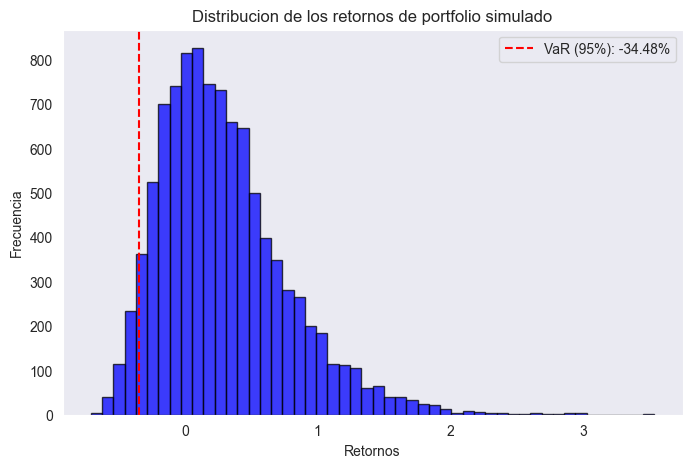

In [23]:
# Descarga de series de APPL 
data = yf.download("AAPL", start = "2020-01-01", end = "2023-01-01", progress=False)

# Caalcula los retornos logaritmicos 
data["Returns"] = np.log(data["Close"] / data["Close"].shift(1))
data.dropna()

# Simula retornos futuros utilizando Simulacion de Montecarlo
num_simulations = 10000   # numero de simulaciones
simulation_horizon = 252  # dias de trading en un año
simulated_returns = np.random.normal(np.mean(data["Returns"]), 
                                     np.std(data["Returns"]), 
                                     (simulation_horizon, num_simulations))

# Simula los valores de portfolio
initial_investment = 1000000  # $1,000,000 posicion inicial
portfolio_values = initial_investment * np.exp(np.cumsum(simulated_returns, axis=0))

# Calcula los retornos de portfolio
portfolio_returns = portfolio_values[-1] / portfolio_values[0] - 1

# Calcula el VaR al 95% de nivel de confianza
confidence_level = 0.95
VaR_monte_carlo = np.percentile(portfolio_returns, (1 - confidence_level) * 100)

print(f"Monte Carlo VaR (95% confidence level): {VaR_monte_carlo:.2%}")

# Plotea la distribucion de la simulacion
plt.figure(figsize=(8, 5))
plt.hist(portfolio_returns, bins = 50, alpha = 0.75, color = 'blue', edgecolor = 'black')
plt.axvline(VaR_monte_carlo, color = 'red', linestyle='--', label=f'VaR (95%): {VaR_monte_carlo:.2%}')
plt.title('Distribucion de los retornos de portfolio simulado')
plt.xlabel('Retornos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Si bien el ejemplo anterior es de tipo univariado, los enfoques multivariados es una aproximación del comportamiento de una serie de escenarios futuros que podría tener una cartera de activos en una fecha dada. 

En general, podemos asumir que las series de precios de los activos siguen la misma dinámica ya descrita anteriormente, sin embargo el problema a abordar, pasa por reconocer que las series proyectadas están correlacionadas, luego el proceso de generación de datos debe incorporar la matriz de correlación.

Un enfoque adoptado, que representa estructuras correlacionadas en simulaciones de montecarlo, se basan en la descomposición de Cholesky, esto significa que una matriz simétrica definida positiva como la matriz de covarianza, puede ser descompuesta como el producto de una matriz triangular inferior y la traspuesta de esta matriz.

A partir de la matriz de covarianzas de las variables, es posible obtener la matriz de Cholesky la que puede ser aplicada a los números aleatorios generados para transformarlos en números aleatorios correlacionados replicando asi, la correlación histórica observada.

Consideremos el vector de retornos $R = [R_x, R_y, R_z]^{\top}$ con una distribución multivariada normal $\mathcal{N}(\mu, \Sigma)$ donde el vector $\mu$, es el vector de retornos promedios y $\Sigma$ es la matriz de covarianzas $n\times n$ simétrica y semi definida positiva, es decir,  

\begin{equation*}
\Sigma\in\mathcal{S}_{++}^{n} = \{ \Sigma\in\mathcal{S}^{n} \ |\ \Sigma \succeq 0\}
\end{equation*}

 Matricialmente, la matriz $\Sigma$ describe en la diagonal, la varianza $\sigma_{i,i} = \hbox{Var}(R_i)$ y los valores fuera de la diagonal, la covarianza $\sigma_{i,j}=\hbox{Cov}(R_i, R_j)$. Por tanto, la covarianza captura la relación lineal entre los retornos de los activos que componen el portafolio. 

Para generar $R\sim\mathcal{N}(\mu, \Sigma)$ , se parte de un vector de variables aleatorias $Z\sim \mathcal{N}(0,I)$ donde $I$ es la matriz identidad, por ende, la relación entre $Z$ y $R$ está definida como $R = \mu + LZ$ donde $L$ es una matriz que satisface $\Sigma  = L L^{\top}$. La descomposición de Cholesky permite factorizar $\Sigma$ en el producto de una matriz triangular inferior $L$, y su traspuesta. 

Para simular $N$ escenarios de retornos correlacionados

* Generar $N$ vectores $Z\sim\mathcal{N}(0,I)$ cada uno con $n$ variables independientes.
* Aplica la transformación $R = \mu + L Z$, pues esto sugiere que las nuevas variables o retornos $R$ tengan estructura de covarianza $\Sigma$
* Utilizar $R$ para calcular las pérdidas o ganancias del portafolio en los $N$ escenarios

In [24]:
# 1. Descarga de series de APPL y Calcula los retornos logaritmicos
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'INTC']
df = yf.download(tickers, start = '2019-01-01', end = '2024-01-01', progress = False)['Close']
df_returns = np.log(df / df.shift(1))
df_returns.dropna()

# Paso 2. Calcular la matriz de covarianza
cov_matrix = df_returns.cov().values
cov_matrix

array([[0.00041271, 0.00027981, 0.00027621, 0.00028049, 0.00029703],
       [0.00027981, 0.00049207, 0.00029462, 0.00024432, 0.00029183],
       [0.00027621, 0.00029462, 0.00040227, 0.00026098, 0.00029309],
       [0.00028049, 0.00024432, 0.00026098, 0.00060446, 0.00027664],
       [0.00029703, 0.00029183, 0.00029309, 0.00027664, 0.00036925]])

In [25]:
# Paso 3. Descomposición de Cholesky (obtiene matriz trinagular inferior)
L = np.linalg.cholesky(cov_matrix)

# Definir el número de simulaciones y el horizonte de simulación 
num_simulations = 10000
simulation_horizon = 252

# Paso 4: Simular rendimientos normales estándar independientes
num_assets = len(tickers)

Z = np.random.normal(size = (num_assets, num_simulations))

# Paso 5: Transformar los rendimientos simulados usando la matriz de Cholesky
correlated_simulated_returns = L @ Z

# Ajustar las simulaciones a la media histórica de los retornos
mean_returns = df_returns.mean().values.reshape(-1, 1)

# Crea la Transformacion de los Retornos incorporando estructura de covarianza
simulated_returns_adjusted = mean_returns + correlated_simulated_returns

In [26]:
# Paso 6: Calcular el valor del portafolio para cada simulación

# Supongamos que la inversión inicial es $1,000,000 distribuida equitativamente
initial_investment = 1000000
weights = np.array([1/num_assets] * num_assets)  # Pesos iguales para cada activo

# Calcular los rendimientos del portafolio simulados
simulated_portfolio_returns = weights @ simulated_returns_adjusted

# Calcular los valores finales del portafolio simulando el cambio en los precios de los activos
portfolio_values = initial_investment * (1 + simulated_portfolio_returns)

Monte Carlo VaR (95% confidence level) using Cholesky: $-28,644.18


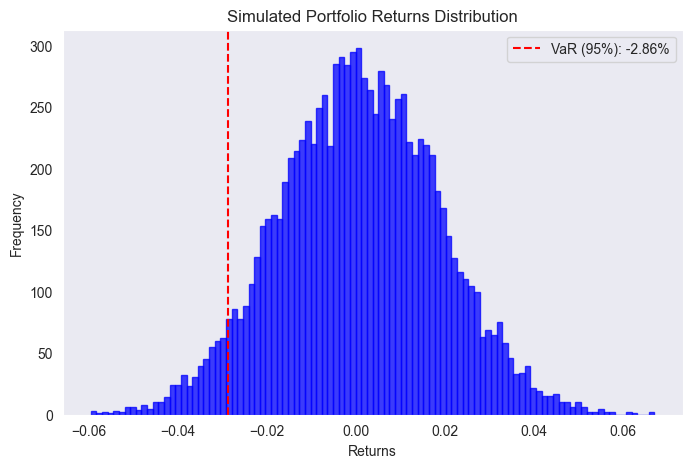

In [27]:
# Paso 7: Calcular el VaR al nivel de confianza deseado
confidence_level = 0.95
VaR_cholesky = np.percentile(simulated_portfolio_returns, (1 - confidence_level) * 100)

# Multiplicar por el valor inicial del portafolio para obtener el VaR en términos monetarios
VaR_monetary = VaR_cholesky * initial_investment

print(f"Monte Carlo VaR (95% confidence level) using Cholesky: ${VaR_monetary:,.2f}")

# Paso 8: Graficar la distribución de los rendimientos simulados y el VaR
plt.figure(figsize=(8, 5))
plt.hist(simulated_portfolio_returns, bins = 100, alpha = 0.75, color = 'blue', edgecolor = 'blue')
plt.axvline(VaR_cholesky, color = 'red', linestyle = '--', label = f'VaR (95%): {VaR_cholesky:.2%}')
plt.title('Simulated Portfolio Returns Distribution')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()